In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from sklearn.metrics import mean_squared_error


In [4]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')


data = data[['Temp']].values


scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)


train_size = int(len(data_scaled) * 0.8)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]


def create_sequences(data, time_step=10):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step, 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X_train, y_train = create_sequences(train_data, time_step)
X_test, y_test = create_sequences(test_data, time_step)


X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (2910, 10, 1)
X_test shape: (720, 10, 1)


In [5]:
# Build the RNN model
rnn_model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(time_step, 1)),
    Dense(1)
])

# Compile the model
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the RNN model
rnn_model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


182/182 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0968 - val_loss: 0.0079
Epoch 2/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0095 - val_loss: 0.0076
Epoch 3/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0089 - val_loss: 0.0076
Epoch 4/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0088 - val_loss: 0.0072
Epoch 5/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0092 - val_loss: 0.0072
Epoch 6/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0093 - val_loss: 0.0071
Epoch 7/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0082 - val_loss: 0.0073
Epoch 8/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0090 - val_loss: 0.0072
Epoch 9/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0089 - val_loss: 0.0071
Epoch 10/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0088 - val_loss: 0.0075
Epoch 11/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0097 - val_loss: 0.0073
Epoch 12/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.

In [6]:
# Build the LSTM model
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(time_step, 1)),
    Dense(1)
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
lstm_model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0511 - val_loss: 0.0098
Epoch 2/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0109 - val_loss: 0.0092
Epoch 3/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0110 - val_loss: 0.0089
Epoch 4/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0104 - val_loss: 0.0088
Epoch 5/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0104 - val_loss: 0.0083
Epoch 6/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0095 - val_loss: 0.0077
Epoch 7/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0092 - val_loss: 0.0078
Epoch 8/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0093 - val_loss: 0.0079
Epoch 9/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0096 - val_loss: 0.0075
Epoch 10/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0088 - val_loss: 0.0073
Epoch 11/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0087 - val_loss: 0.0083
Epoch 12/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

In [7]:
# RNN Predictions
rnn_predictions = rnn_model.predict(X_test)
rnn_predictions = scaler.inverse_transform(rnn_predictions)

# LSTM Predictions
lstm_predictions = lstm_model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Actual Values
actual = scaler.inverse_transform(y_test.reshape(-1, 1))


rnn_mse = mean_squared_error(actual, rnn_predictions)
lstm_mse = mean_squared_error(actual, lstm_predictions)

print(f"RNN MSE: {rnn_mse}")
print(f"LSTM MSE: {lstm_mse}")


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
RNN MSE: 5.180011800032521
LSTM MSE: 4.947174197590399


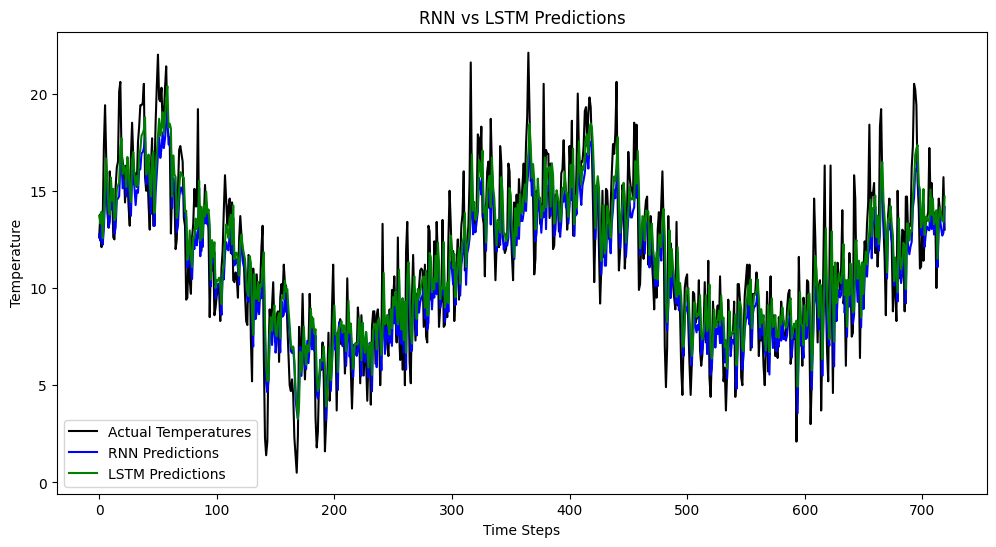

In [8]:
# Plotting actual vs predicted values
plt.figure(figsize=(12, 6))

plt.plot(actual, label='Actual Temperatures', color='black')
plt.plot(rnn_predictions, label='RNN Predictions', color='blue')
plt.plot(lstm_predictions, label='LSTM Predictions', color='green')

plt.title("RNN vs LSTM Predictions")
plt.xlabel("Time Steps")
plt.ylabel("Temperature")
plt.legend()
plt.show()
